<a href="https://colab.research.google.com/github/Badal95408/SCT_DS_02/blob/main/SCT_DS_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Libraries**

In [1]:
# ============================================================
# Step 1: Import Libraries
# ============================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

# ============================================================
# Step 2: Unzip Dataset (Upload ZIP file in Colab first)
# ============================================================
from google.colab import files

# Upload the zip file (this will open a file upload dialog in Colab)
uploaded = files.upload()

# Extract the zip file (change filename if different)
with zipfile.ZipFile("titanic.zip", 'r') as zip_ref:
    zip_ref.extractall("titanic_data")

# ============================================================
# Step 3: Load Dataset
# ============================================================
# Usually the Titanic dataset file is named "train.csv"
data = pd.read_csv("titanic_data/train.csv")

# Check first few rows
print("Shape of dataset:", data.shape)
data.head()


Saving titanic.zip to titanic.zip
Shape of dataset: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## **Extracting Basic Information**

In [2]:
# Dataset info
data.info()

# Check missing values
print("\nMissing Values:\n", data.isnull().sum())

# Basic statistics
data.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## **Data Cleaning**

In [3]:
# Fill missing values
data['Age'] = data['Age'].fillna(data['Age'].median())
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
data['Cabin'] = data['Cabin'].fillna('Unknown')

# Drop unnecessary columns
data_clean = data.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

data_clean.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,Unknown,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,Unknown,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,Unknown,S


## **Exploratory Data Analysis (EDA)**

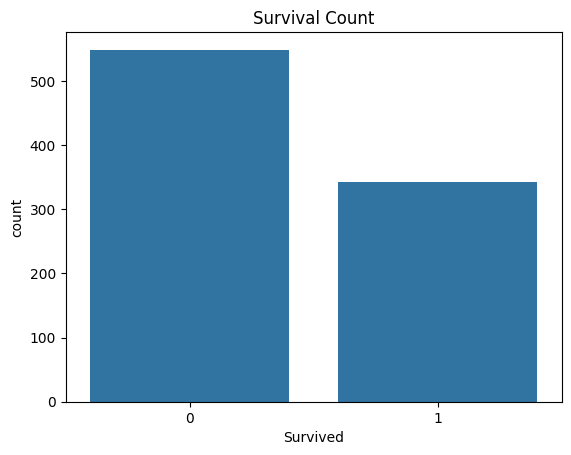

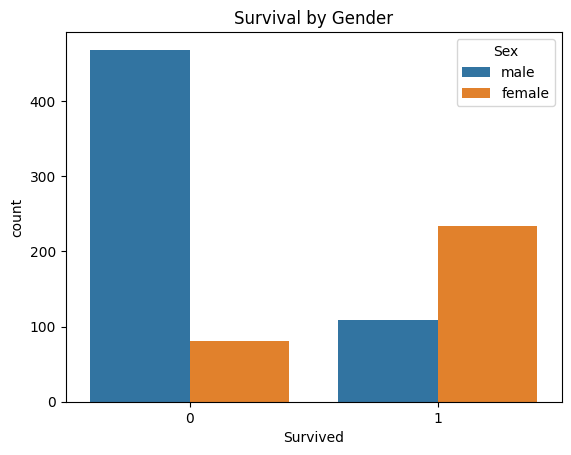

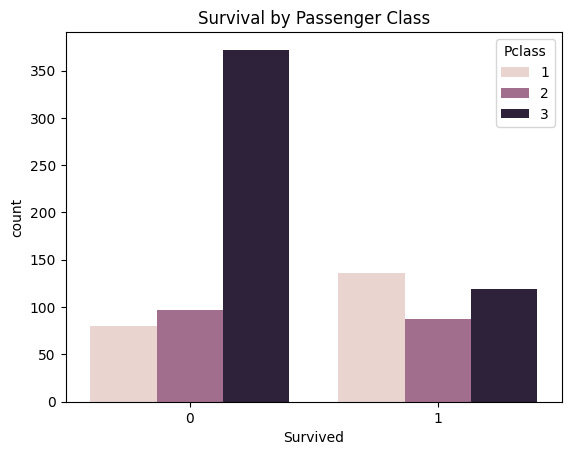

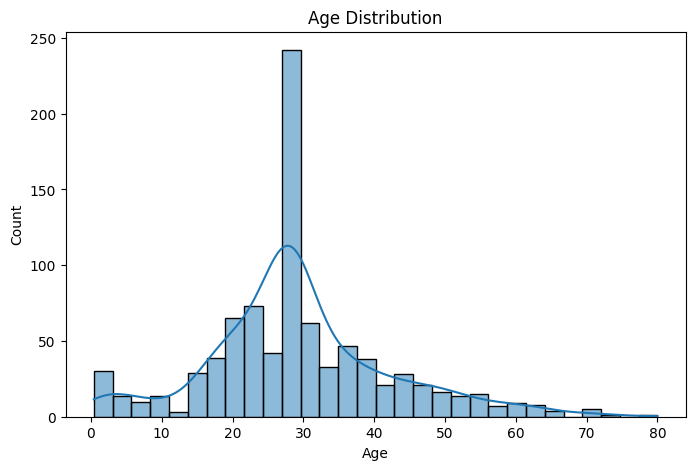

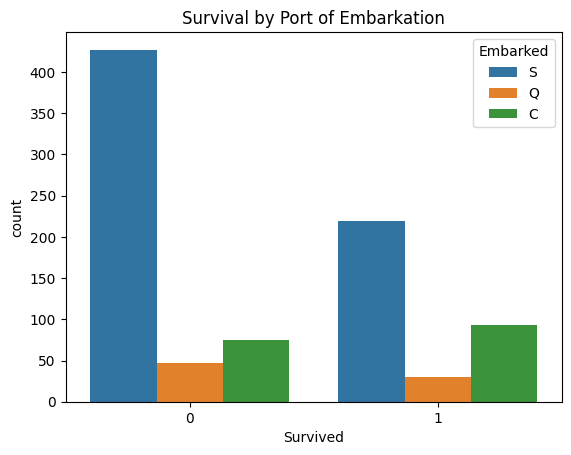

In [4]:
# Survival count
sns.countplot(x='Survived', data=data_clean)
plt.title("Survival Count")
plt.show()

# Survival by Gender
sns.countplot(x='Survived', hue='Sex', data=data_clean)
plt.title("Survival by Gender")
plt.show()

# Survival by Passenger Class
sns.countplot(x='Survived', hue='Pclass', data=data_clean)
plt.title("Survival by Passenger Class")
plt.show()

# Age distribution
plt.figure(figsize=(8,5))
sns.histplot(data_clean['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

# Survival by Embarked
sns.countplot(x='Survived', hue='Embarked', data=data_clean)
plt.title("Survival by Port of Embarkation")
plt.show()


## **Correlation Analysis**

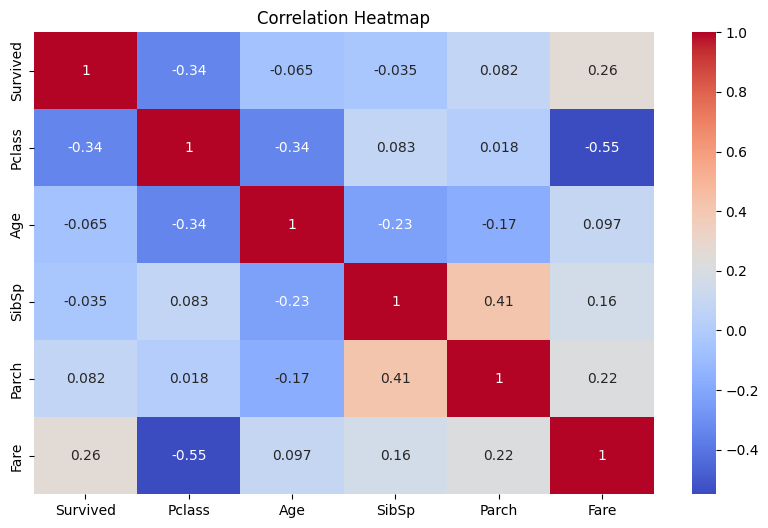

In [6]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
# Select only numerical columns for correlation
numerical_data_clean = data_clean.select_dtypes(include=np.number)
sns.heatmap(numerical_data_clean.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## **Insights**

In [ ]:
#After running the above, you’ll be able to see:

#Women had higher survival chances.

#Higher class passengers (Pclass=1) survived more.

#Younger children had better chances.

#Port of Embarkation also had some survival differences.